In [54]:
#All important packages
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Reading the CSV file
tweet_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [10]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open(os.path.join(os.getcwd(), url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

In [11]:
doggo_df = pd.read_csv('image-predictions.tsv', sep='\t')

In [15]:
consumer_key = 'XXXX'
consumer_secret = 'XXX'
access_token = 'XXX'
access_secret = 'XXXX'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [18]:
t_id = []
t_fc = []
t_rtc = []
with open('tweet_json.txt', mode = 'r') as f:
     for line in f.readlines():
            tweet_data = json.loads(line)
            t_id.append(tweet_data['id'])
            t_fc.append(tweet_data['favorite_count'])
            t_rtc.append(tweet_data['retweet_count'])
            
doggo_data = pd.DataFrame({'tweet_id':t_id, 'favorite_count':t_fc, 'retweet_count':t_rtc})

Now that we have data loaded in a JSON file, we will start the process of :

# assessing the data.

In [19]:
tweet_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [20]:
tweet_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [21]:
tweet_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1962,673355879178194945,NaN,NaN,2015-12-06 04:18:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. She's a boss. Helps shift gears....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673355879...,11,10,Koda,None,None,None,None
588,799422933579902976,NaN,NaN,2016-11-18 01:24:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Longfellow (prolly sophisticated). He'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/799422933...,12,10,Longfellow,None,None,None,None
1664,682788441537560576,NaN,NaN,2016-01-01 05:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy New Year from your fav holiday squad! 🎉 ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682788441...,12,10,None,None,None,pupper,None
1663,682808988178739200,6.827884e+17,4.196984e+09,2016-01-01 06:22:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I'm aware that I could've said 20/16, but here...",NaN,NaN,NaN,NaN,20,16,None,None,None,None,None
2121,670408998013820928,NaN,NaN,2015-11-28 01:08:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Peanut. He was the World Table Tennis ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670408998...,10,10,Peanut,None,None,None,None


In [22]:
tweet_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [23]:
print(tweet_archive[tweet_archive.tweet_id.isnull()])

Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []


In [24]:
print(tweet_archive[tweet_archive.tweet_id.duplicated()])

Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []


In [25]:
print(tweet_archive[tweet_archive.rating_numerator == 0])

                tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
315   835152434251116546                    NaN                  NaN   
1016  746906459439529985           7.468859e+17         4.196984e+09   

                      timestamp  \
315   2017-02-24 15:40:31 +0000   
1016  2016-06-26 03:22:31 +0000   

                                                 source  \
315   <a href="http://twitter.com/download/iphone" r...   
1016  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
315   When you're so blinded by your systematic plag...                  NaN   
1016  PUPDATE: can't see any. Even if I could, I cou...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
315                        NaN                        NaN   
1016                       NaN                        NaN   

                                          expanded_urls  rating_numerator 

In [26]:
print(tweet_archive.name.value_counts())

None        745
a            55
Charlie      12
Cooper       11
Lucy         11
Oliver       11
Lola         10
Tucker       10
Penny        10
Bo            9
Winston       9
Sadie         8
the           8
Buddy         7
Toby          7
Daisy         7
an            7
Bailey        7
Milo          6
Dave          6
Leo           6
Jack          6
Rusty         6
Oscar         6
Koda          6
Scout         6
Stanley       6
Jax           6
Bella         6
Gus           5
           ... 
Stark         1
Livvie        1
Ruffles       1
Burt          1
Aldrick       1
Miguel        1
Mitch         1
Ralphie       1
my            1
Monkey        1
Edgar         1
Pluto         1
Timofy        1
Binky         1
Rorie         1
Scott         1
Heinrich      1
Shelby        1
Danny         1
Brandi        1
Eriq          1
Callie        1
Rhino         1
Kayla         1
Lassie        1
Corey         1
Fletcher      1
Ole           1
Snoop         1
Acro          1
Name: name, Length: 957,

Now, we will assess data from the doggo_df data

In [28]:
doggo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [29]:
doggo_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [30]:
doggo_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


Now, we will assess data from doggo_data

In [31]:
doggo_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2339 entries, 0 to 2338
Data columns (total 3 columns):
tweet_id          2339 non-null int64
favorite_count    2339 non-null int64
retweet_count     2339 non-null int64
dtypes: int64(3)
memory usage: 54.9 KB


In [32]:
doggo_data.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,37786,8236
1,892177421306343426,32463,6087
2,891815181378084864,24439,4028
3,891689557279858688,41115,8393
4,891327558926688256,39330,9090


In [33]:
doggo_data.describe()

,tweet_id,favorite_count,retweet_count
count,2.339000e+03,2339.000000,2339.000000
mean,7.421620e+17,7900.268491,2903.417700
std,6.828729e+16,12245.516134,4895.514983
min,6.660209e+17,0.000000,0.000000
25%,6.783378e+17,1368.000000,583.500000
50%,7.186133e+17,3438.000000,1354.000000
75%,7.986907e+17,9679.500000,3383.500000
max,8.924206e+17,163179.000000,82974.000000


## Issues with the Data

### Data Tidiness

1. The columns doggo, pupper, puppo, and floofer are variations of an entity so they all can be merged.
2. For a better result, all the three dataframes should become a single dataframe.


### Data Quality

1. In many dataframes, there's issue of wrong datatype.
    In tweet_archive, we have issues with tweet_id, in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, and timestamp.    
    In doggo_df the issue is with tweet_id.
    In doggo_data the isssue is with tweet_id.
    
2. There are issues with dog's name
3. Missing image data of breed predictions
4. We don't need reweets.


# Data Cleaning




First, we need to create copies of the dataframes so that we don't spoil the data.

In [38]:
tweet_archive_c = tweet_archive.copy()
doggo_df_c = doggo_df.copy()
doggo_data_c = doggo_data.copy()

##### Cleaning for tidiness

1. Combine the doggo, pupper, puppo, and floofer columns into one column using melt.

In [37]:
#TO create list of originals IDs.
tweet_ids = tweet_archive_c.tweet_id.tolist()

#Melting the columns
tweet_archive_c =pd.melt(tweet_archive_c, id_vars = ['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id',
                                       'retweeted_status_user_id', 'timestamp', 'source', 'text', 'retweeted_status_timestamp',
                                       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name'], 
        var_name = 'type_toberemoved', value_name = 'type')
tweet_archive_c = tweet_archive_c.drop('type_toberemoved', axis =1)


2. Merging data frames

In [39]:
tweet_archive_c = pd.merge(tweet_archive_c, doggo_df_c, on = ['tweet_id'], how = 'inner')


In [40]:
tweet_archive_c = pd.merge(tweet_archive_c, doggo_data_c, on ='tweet_id', how = 'inner')

In [43]:
tweet_archive_c.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,favorite_count,retweet_count
count,2.066000e+03,2.300000e+01,2.300000e+01,7.500000e+01,7.500000e+01,2066.000000,2066.000000,2066.000000,2066.000000,2.066000e+03,2.066000e+03,2066.000000,2066.000000
mean,7.380806e+17,6.978112e+17,4.196984e+09,7.628386e+17,1.049949e+16,12.263795,10.513553,1.203291,0.594568,1.346716e-01,6.034151e-02,8345.934172,2776.956922
std,6.763392e+16,4.359384e+16,0.000000e+00,5.813066e+16,9.092825e+16,40.768770,7.192615,0.562172,0.271062,1.007233e-01,5.094272e-02,12584.134136,4837.389273
min,6.660209e+17,6.671522e+17,4.196984e+09,6.675094e+17,7.832140e+05,0.000000,2.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,0.000000,11.000000
25%,6.764332e+17,6.732411e+17,4.196984e+09,7.118465e+17,4.196984e+09,10.000000,10.000000,1.000000,0.364254,5.387868e-02,1.621080e-02,1588.750000,592.000000
50%,7.117137e+17,6.757073e+17,4.196984e+09,7.761133e+17,4.196984e+09,11.000000,10.000000,1.000000,0.588030,1.184015e-01,4.939645e-02,3671.500000,1307.000000
75%,7.931317e+17,7.031489e+17,4.196984e+09,7.981456e+17,4.196984e+09,12.000000,10.000000,1.000000,0.843883,1.955693e-01,9.208967e-02,10423.750000,3202.250000
max,8.924206e+17,8.558181e+17,4.196984e+09,8.768508e+17,7.874618e+17,1776.000000,170.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,163179.000000,82974.000000


In [45]:
tweet_archive_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2066 entries, 0 to 2065
Data columns (total 30 columns):
tweet_id                      2066 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2066 non-null object
source                        2066 non-null object
text                          2066 non-null object
retweeted_status_id           75 non-null float64
retweeted_status_user_id      75 non-null float64
retweeted_status_timestamp    75 non-null object
expanded_urls                 2066 non-null object
rating_numerator              2066 non-null int64
rating_denominator            2066 non-null int64
name                          2066 non-null object
doggo                         2066 non-null object
floofer                       2066 non-null object
pupper                        2066 non-null object
puppo                         2066 non-null object
jpg_url                       2066 

#### Cleaning for Quality

1. Fixing wrong datatypes
Since, we have merged the three dataframes, we can now eaily fix the issue of wrong datatype. 

In [46]:
#Convert tweet_id to string
tweet_archive_c.tweet_id = tweet_archive_c.tweet_id.astype('str')


In [48]:
#convert timestamp to datetime
tweet_archive_c.timestamp = pd.to_datetime(tweet_archive_c.timestamp)

In [49]:
#checking for change
tweet_archive_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2066 entries, 0 to 2065
Data columns (total 30 columns):
tweet_id                      2066 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2066 non-null datetime64[ns]
source                        2066 non-null object
text                          2066 non-null object
retweeted_status_id           75 non-null float64
retweeted_status_user_id      75 non-null float64
retweeted_status_timestamp    75 non-null object
expanded_urls                 2066 non-null object
rating_numerator              2066 non-null int64
rating_denominator            2066 non-null int64
name                          2066 non-null object
doggo                         2066 non-null object
floofer                       2066 non-null object
pupper                        2066 non-null object
puppo                         2066 non-null object
jpg_url                   

2. Resolving the issues with dog's name

In [50]:
tweet_archive_c.name.value_counts()


None         575
a             55
Lucy          10
Penny         10
Oliver        10
Charlie       10
Cooper        10
Tucker        10
Lola           8
Winston        8
Sadie          8
Bo             8
Daisy          7
the            7
Toby           7
an             7
Rusty          6
Jax            6
Stanley        6
Milo           6
Dave           6
Bailey         6
Bella          6
Koda           6
Scout          6
Louis          5
Oscar          5
Alfie          5
Chester        5
Buddy          5
            ... 
light          1
Godzilla       1
Nollie         1
Aubie          1
Bobb           1
Ralphé         1
Superpup       1
Beya           1
Malikai        1
Lulu           1
Cedrick        1
Norman         1
JD             1
Clyde          1
Mutt           1
Kial           1
Ester          1
Ronnie         1
Pubert         1
Ambrose        1
Lupe           1
Sundance       1
Doobert        1
Harnold        1
Dug            1
DayZ           1
Hubertson      1
Bode          

It can be seen that there are names like a,an etc. and a total of 575 none values. This can be resolved by first finding the names of the dogs which do not start with capital letters & with emply name and moving them to None.

In [55]:
names_error = []
for idx, name in enumerate(tweet_archive_c.name):
     if name.islower() or name == 'None':
        j = re.compile('(?:named\s|name\sis\s)(\w+)')
        if j.findall(tweet_archive_c.loc[idx,'text']):
            tweet_archive_c.loc[idx,'name'] = j.findall(tweet_archive_c.loc[idx,'text'])[0]        
        else:
            tweet_archive_c.loc[idx,'name'] = 'None'


tweet_archive_c.name.value_counts()

The names with none have increased. That means we have moved no names and none capital dog names to none.

3. Missing images to predict breed.
Since, we need images to predict the breed of the dog. We will drop all the rows which don't have an image.

In [60]:
tweet_archive_c=tweet_archive_c[~tweet_archive_c.jpg_url.isnull()]


4. We don't need reweets and related data.

In [61]:
#dropping reply tweet
tweet_archive_clean = tweet_archive_c[tweet_archive_c.in_reply_to_status_id.isnull()]

#dropping retweeted tweets
tweet_archive_c = tweet_archive_c[tweet_archive_c.retweeted_status_id.isnull()]

#dropping columns related to tweets that were retweeted or reply tweets
tweet_archive_c = tweet_archive_c.drop(labels = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id',
                           'retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1 )

In [64]:
#Storing the new cleaned data
tweet_archive_c.to_csv('twitter_archive_master.csv', index = False)

# Analyzing and Visualizing

In [63]:
tweet_archive_c.describe()

,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,favorite_count,retweet_count
count,1991.000000,1991.000000,1991.000000,1991.000000,1.991000e+03,1.991000e+03,1991.000000,1991.000000
mean,12.281768,10.532898,1.202913,0.593546,1.344798e-01,6.030671e-02,8660.321447,2627.324962
std,41.528951,7.326197,0.560878,0.271878,1.006249e-01,5.089760e-02,12712.384784,4688.937411
min,0.000000,2.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,77.000000,11.000000
25%,10.000000,10.000000,1.000000,0.362715,5.409535e-02,1.622240e-02,1861.000000,588.000000
50%,11.000000,10.000000,1.000000,0.587372,1.175080e-01,4.952370e-02,3918.000000,1262.000000
75%,12.000000,10.000000,1.000000,0.844583,1.950575e-01,9.164355e-02,10785.000000,2998.500000
max,1776.000000,170.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,163179.000000,82974.000000


In [65]:
tweet_archive_c.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,37786,8236
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,32463,6087
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,24439,4028
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,41115,8393
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,39330,9090


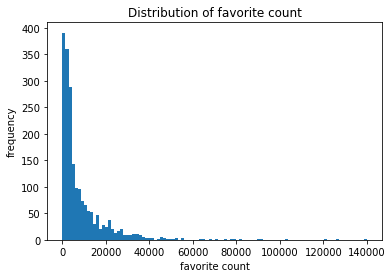

In [68]:
#Distribution of Favourites counts

bin_boundaries = np.linspace(0,140000, 101)
plt.hist(tweet_archive_c.favorite_count, bins=bin_boundaries)
plt.xlabel('favorite count')
plt.ylabel('frequency')
plt.title('Distribution of favorite count');

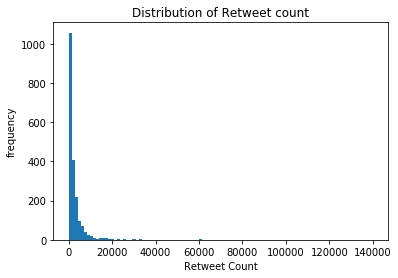

In [70]:
#Dsitribution of Retweet Counts

bin_boundaries = np.linspace(0,140000, 101)
plt.hist(tweet_archive_c.retweet_count, bins=bin_boundaries)
plt.xlabel('Retweet Count')
plt.ylabel('frequency')
plt.title('Distribution of Retweet count');

Since both the Retweet Counts and Favorite Counts are heavily skewed, we will have to use log transformations on the data.

In [73]:
to_log = ['favorite_count']
df_logged = tweet_archive_c[to_log].applymap(lambda x: np.log10(x))

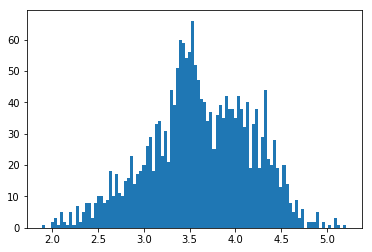

In [74]:
plt.hist(x = df_logged.favorite_count, bins = 100)
plt.show()

It can be observed that log transformation of favorite count is normally distributed.

In [76]:
to_log = ['retweet_count']
df_loggedr = tweet_archive_c[to_log].applymap(lambda x: np.log10(x))

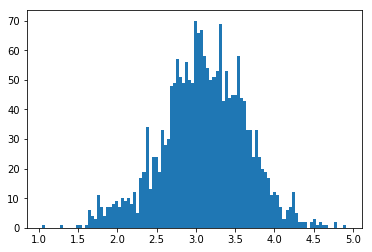

In [77]:
plt.hist(x = df_loggedr.retweet_count, bins = 100)
plt.show()

It can be observed that log transformation of retweet count is normally distributed.


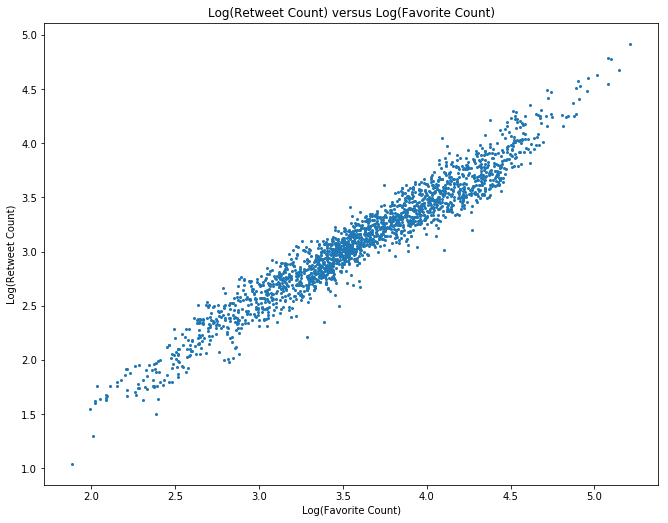

0.96793532481266009

In [96]:
plt.figure(1, figsize = (11, 8.5))
plt.plot(df_logged.favorite_count, df_loggedr.retweet_count, marker='o', linestyle='', ms=2 )
plt.title('Log(Retweet Count) versus Log(Favorite Count)')
plt.xlabel('Log(Favorite Count)')
plt.ylabel('Log(Retweet Count)')
plt.show()
np.corrcoef(df_loggedr.retweet_count, df_logged.favorite_count)[0][1]




This shows that retweet count and favorite count have a very strong direct relationship.


##### Distribution of rating numerator

In [79]:
tweet_archive_c.rating_numerator.describe()

count    1991.000000
mean       12.281768
std        41.528951
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

Text(0.5,1,'Distribution of rating_numerator')

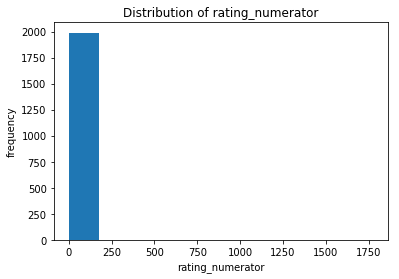

In [88]:
plt.hist(tweet_archive_c.rating_numerator)
plt.xlabel('rating_numerator')
plt.ylabel('frequency')
plt.title('Distribution of rating_numerator')

In [87]:
# Since the above graph doesn;t express much,
rating_counts = tweet_archive_c.groupby(['rating_numerator']).count()['tweet_id']
rating_counts

rating_numerator
0         2
1         5
2         9
3        19
4        16
5        33
6        32
7        52
8        95
9       151
10      418
11      396
12      449
13      260
14       35
24        1
26        1
27        1
44        1
45        1
50        1
60        1
75        1
80        1
84        1
88        1
99        1
121       1
143       1
144       1
165       1
204       1
420       1
1776      1
Name: tweet_id, dtype: int64

Since, we failed to plot a graph with that vivid rating numerator, we can observe that the ratings till 14 has more than one values. SO we wiil plot a graph with ratings from 0 to 14.

In [99]:
tweet_archive_c.rating_numerator = tweet_archive_c.rating_numerator.astype('float')



In [100]:
tweet_archive_c_integer_ratings_14 = tweet_archive_c[(tweet_archive_c.rating_numerator <= 14) & (tweet_archive_c.rating_numerator.apply(float.is_integer))]



In [106]:
subset_df = tweet_archive_c_integer_ratings_14.groupby(['rating_numerator']).count()['tweet_id']

subset_df

rating_numerator
0.0       2
1.0       5
2.0       9
3.0      19
4.0      16
5.0      33
6.0      32
7.0      52
8.0      95
9.0     151
10.0    418
11.0    396
12.0    449
13.0    260
14.0     35
Name: tweet_id, dtype: int64

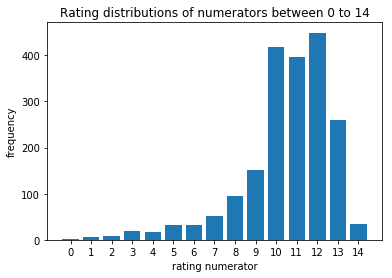

In [109]:
plt.bar(np.arange(15), subset_df)
plt.xticks(np.arange(15))
plt.xlabel('rating numerator')
plt.ylabel('frequency')
plt.title('Rating distributions of numerators between 0 to 14');

This distribution shows that most of the pics related rating between 10 to 12. With 12 being the most rated value.

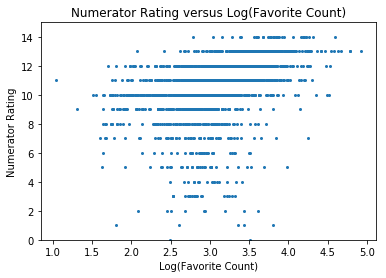

In [122]:
plt.plot(df_loggedr.retweet_count, tweet_archive_c.rating_numerator, marker ='o', linestyle='', ms= 2)
plt.title('Numerator Rating versus Log(Favorite Count)')
plt.xlabel('Log(Favorite Count)')
plt.ylabel('Numerator Rating')
plt.ylim(0,15)
plt.show()

This shows that pics with better ratings receive better retweets.

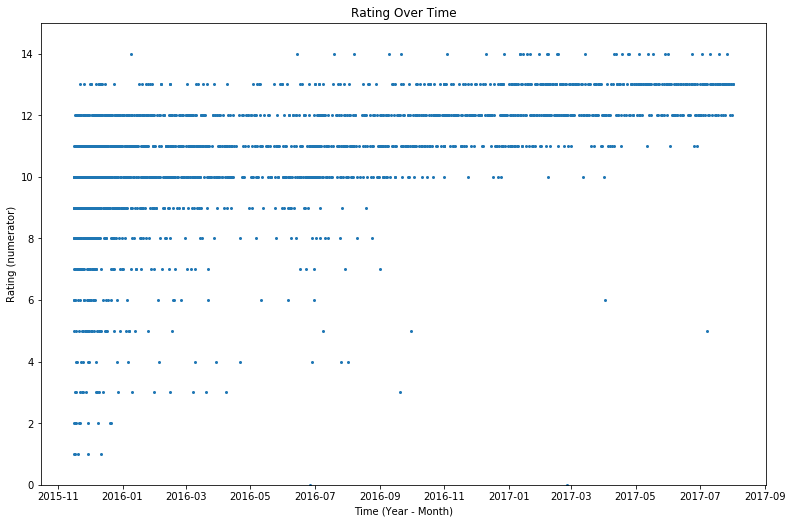

In [124]:
plt.figure(1, figsize = (13, 8.5))
plt.plot(tweet_archive_c.timestamp, tweet_archive_c.rating_numerator, marker='o', linestyle='', ms = 2)
plt.ylim(0,15)
plt.title('Rating Over Time')
plt.ylabel('Rating (numerator)')
plt.xlabel('Time (Year - Month)')
plt.show()

This shows pics with better rating keep receiving ratings over time.

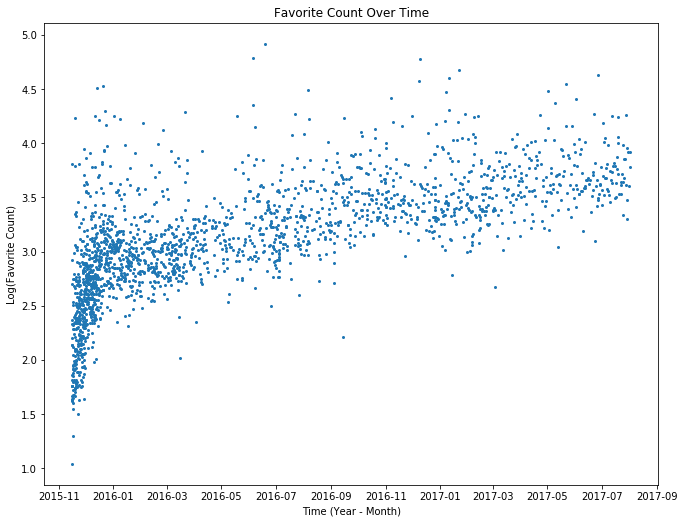

In [121]:
plt.figure(1, figsize = (11, 8.5))
plt.plot(tweet_archive_c.timestamp ,df_loggedr.retweet_count, marker = 'o', linestyle = '', ms = 2)
plt.title('Favorite Count Over Time')
plt.xlabel('Time (Year - Month)')
plt.ylabel('Log(Favorite Count)')
plt.show()

The above plot shows that this account was quite popular at the beginning but slowly started to fade away.